<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [2]:
# Imports
import networkx as nx
import utils as ut
import random
from queue import PriorityQueue

In [3]:
def find_set(G, parent, node):
    if parent[node] == node:
        return node
    return find_set(G, parent, parent[node])

In [4]:
def union(G, parent, rank, node1, node2):
    node1_parent = find_set(G, parent, node1)
    node2_parent = find_set(G, parent, node2)
    if node1_parent == node2_parent:
        return
    if rank[node1_parent] > rank[node2_parent]:
         parent[node2_parent] = node1_parent
    else:
        parent[node1_parent] = node2_parent
        if rank[node1_parent] == rank[node2_parent]:
            rank[node2_parent] += 1 
    

In [5]:
def getWeight(G,item):
    return G.edges[item[0],item[1]]['weight']

In [6]:
def kruskal(G):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
    Returns:
        tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """ 
    # Implement Kruskal algorithm here
    
    # Variables
    tree = nx.Graph()
    total_weight = 0 
    sorted_edges = []
    parent = [] 
    rank = [] 

    # Creamos los conjuntos de cada nodo
    for node in G.nodes:
        parent.append(node)
        rank.append(0)   
        
    # Vamos a ordenar todas las aristas por sus pesos de menor a mayor
    for item in G.edges:
        sorted_edges.append((getWeight(G,item), item))

    sorted_edges.sort()
    
    # Para cada arista con sus pesos
    for elem in sorted_edges:
        # Cogemos la arista y comparamos si los sets de cada nodo que forman la arista son
        # el mismo set o diferentes
        item = elem[1]
        if find_set(G,parent,item[0]) != find_set(G,parent,item[1]):
            # Si son diferentes los sets, los unimos
            union(G, parent, rank, find_set(G,parent,item[0]), find_set(G,parent,item[1]))
            # Añadimos el edge al tree y sumamos el peso al total
            tree.add_edge(item[0],item[1])
            total_weight += getWeight(G,item)   
   
    return tree, total_weight

TOTAL MST WEIGHT
NX MST  10
Kruskal 10


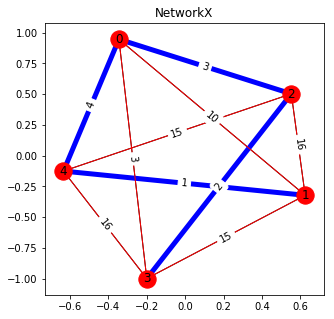

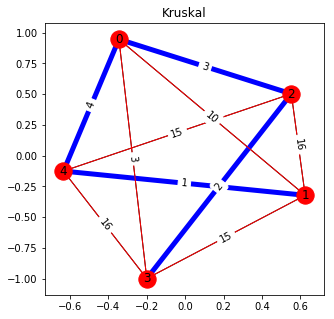

In [10]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)
test_algs(G,kruskal,prim,1)


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [8]:
def prim(G,origen=None,infinity=float(999999)):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    # Implement Prim algorithm here
    # Inicializamos las variables
    tree = nx.Graph()
    visited_nodes = set()
    total_weight = 0
    
    # Seleccionamos el nodo origen 
    if origen == None:
        origen = 0
    
    
    visited_nodes.add(origen)
    
    print(G.edges())
    
    # Mientras no hayamos visitado todo los nodos...
    
    while len(visited_nodes) != len(G.nodes()):
        aux = set()
        for visitado in visited_nodes:
            for nodo in G.nodes():
                if nodo not in visited_nodes and (visitado, nodo) in G.edges():
                    aux.add((visitado, nodo))
        
        edge = sorted(aux, key = lambda arista:G.edges()[arista[0], arista[1]]['weight'])[0]
        
        peso = G.edges()[edge[0], edge[1]]['weight']
        tree.add_edge(edge[0], edge[1], weight = peso )     
        visited_nodes.add(edge[1])
        total_weight += peso
    
    return tree, total_weight

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
TOTAL MST WEIGHT
NX MST  6
Kruskal 6
Prim    6


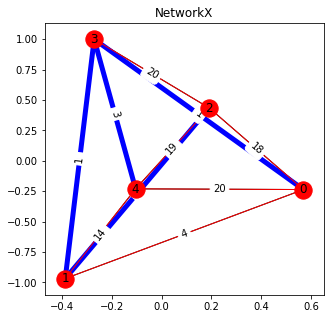

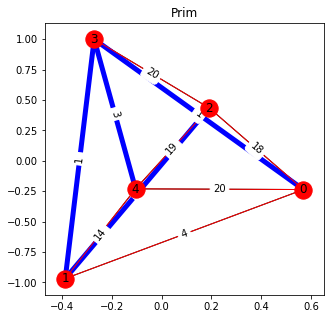

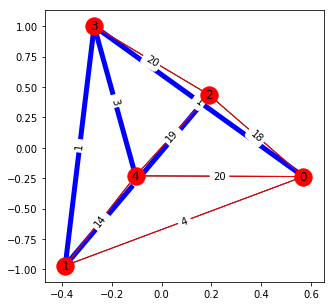

In [9]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

# Run test
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

Las diferencias entre krukal y prim son:
+ Kruskal empieza en una arista determinada, mientras que Prim desde una arista cuyo nodo inicial es random.
+ Kruskal añade las aristas de una lista ordenada, cuyo peso sea el minimo, al nuevo grafo mientras no creen ciclos. Mientras que Prim añade la arista de coste minimo que contenga al menos 1 nodo ya visitado antes.
+ La complejidad de Kruskal, O(ElogE), es menos que la de Prim, O(n^2).

Para un grafo con muchos ciclos es mejor Kruskal, pero para un grafo cuyos nodos solo tinen una arista de peso minimo, tal que el nuevo grafo es la unión seguida de todos los nodos, es mejor Prim.


<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

La explicación esta en cada algoritmo y la complejidad de Kruskal es O(ElogE) y de Prim, O(n^2)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>